# CS5495 - Explainable AI
# Lecture 5b - Deep Neural Networks, Feature Visualization methods
## Prof. Antoni B. Chan
### Dept. of Computer Science, City University of Hong Kong

# Outline
1. Multiclass Logistic Regressin
2. Multilayer Perceptron
3. Convolutional Neural Network
4. **Deep Networks**
5. Feature Visualization
6. Network Dissection

In [3]:
# setup
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # display larger images
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Deep Neural Networks
- Many architecture tricks developed to make training of deeper networks feasible.
  - Batch normalization
  - Network in Network
  - Residual Networks

# Batch Normalization
- For each node in  each layer, normalize the outputs to zero mean and unit variance, *over each mini-batch*.
  - this is analogous to the idea of normalizing the input feature vector to (0,1) Gaussian with  standard ML models!

- Place batchnorm layer after linear transformation.

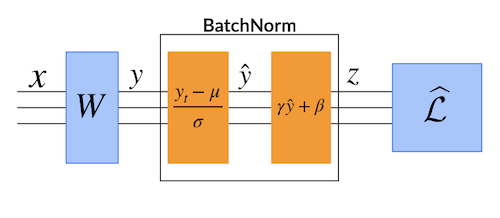

  - Let $\{y_i\}_{i=1}^N$ be the output of the linear transform in one minibatch. 
  - For each node  (dimension) in the layer:
    - normalize: $\hat{y}_i = \frac{y_i - \mu}{\sqrt{\sigma^2+\epsilon}}$
      - $\mu,\sigma^2$ are the mean and variance of $\{y_i\}$ in the mini-batch.
      - $\epsilon$ is a small constant for numerical stability.
    - scale-shift: $z_i = \gamma \hat{y}_i+\beta$
      - $\gamma,\beta$ are learnable parameters
      - puts the output in the proper regime of the non-linear activation.
    - The final distribution has mean $\beta$ and variance $\gamma^2$.

- Notes: 
  - batchnorm is applied to each node independently.
  - makes training more stable.


# Image Classification
- **Goal:** given an image, predict the object class
  - typically only one main object is present
  - If enough classes are considered, then it's a generic high-level vision task
  
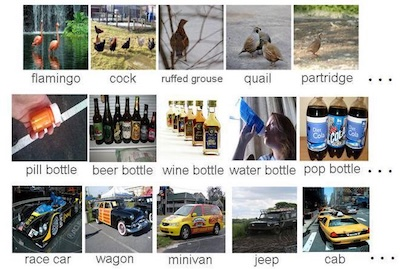

# ImageNet
- ImageNet Large Scale Visual Recognition Challenge (ILSVRC)
  - 1000 image classes
  - 1.2 million images
  - Human performance: ~5.1% (top-5 classification error)

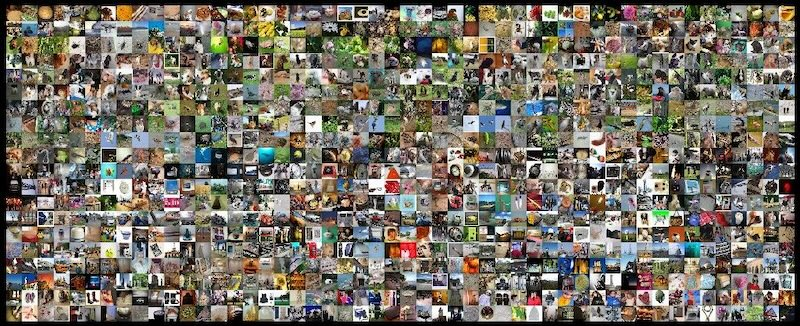

# LeNet-5 (1998)

- The standard CNN architecture
  - 7 layers
  - convolutions & pooling, final fully-connected layer
- Designed for hand-written digit recongition (MNIST)

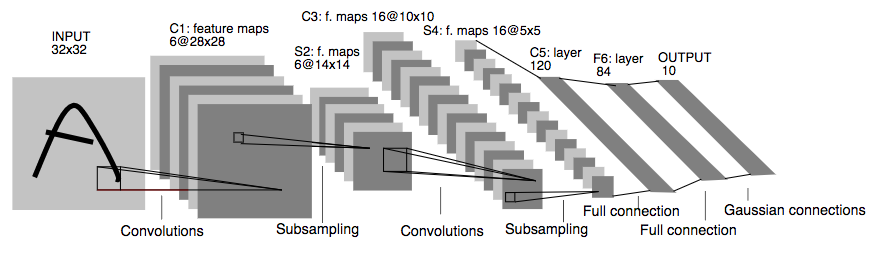

# AlexNet
- Similar architecture to LeNet, but deeper (14 layers)
  - 11x11, 5x5, 3x3 convolutions
- Tricks used: DropOut, ReLU, max pooling, data augmentation, SGD momentum
- One of the first networks trained on GPU
  - (it is split in two pipelines because it was trained on 2 GPUs simultaneously)

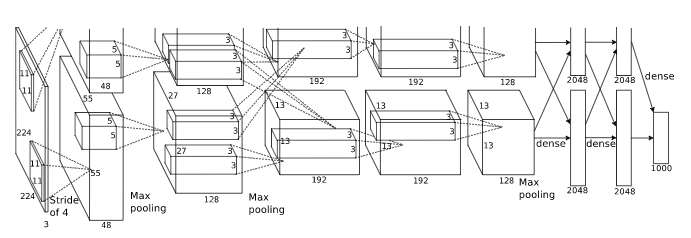

# VGGnet
- Same style as LeNet and AlexNet
- Design choices:
  - only use 3x3 convolution filters (less parameters)
  - stack several convolution layers one after another, followed by pooling
    - equivalent to using a larger filter, but with less parameters.
  - number of feature channels doubles after each stage.
    - more higher-level features
    
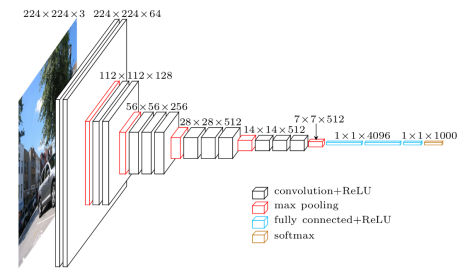

# InceptionNet
- "Network-in-Network" architecture
  - Core building blocks (modules), consisting of several layers, are combined repeatedly.
- Inception Module
  - several convolution filters in parallel
    - extract features at different scales (1x1, 3x3, 5x5)
    - pool features (3x3 max)
  - features are concatenated and passed to next block.

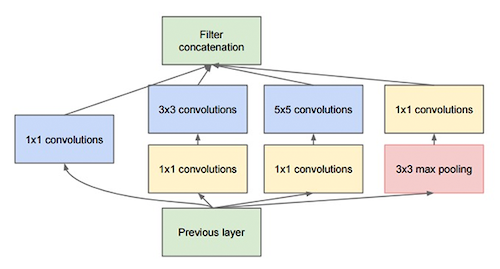

# InceptionNet (V1)
- 9 inception modules, 22 layers
  - 50 convolution blocks
- Auxiliary classification tasks
  - using features in the middle of the network to perform classification (yellow boxes)

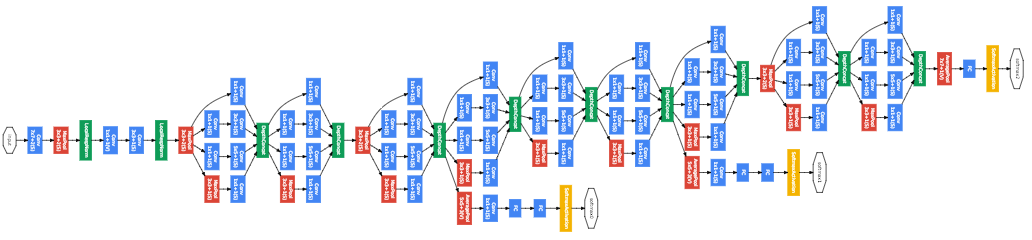

# Going deeper
- **Idea:** when stacking more layers, we should not have degraded performance, since we could make the new layer as an "identity" layer.
  - if $\mathbf{A} = \mathbf{I}$, then $f_i(\mathbf{x}) = \mathbf{A}^T\mathbf{x} = \mathbf{x}$
  - i.e., this layer doesn't change the hidden values from the previous layer.
- **Problem:** if we use L2 regularization on $\mathbf{A}$, then we encourage $\mathbf{A}\rightarrow 0$.
  - so we cannot get this behavior...

# Residual Learning
- **Solution**: learn a residual function so that if $\mathbf{A}=0$, then $f(\mathbf{x})=\mathbf{x}$
  - residual function ${\cal F}(\mathbf{x}) = \mathbf{A}^T\mathbf{x}$
  - output: $f(\mathbf{x}) = {\cal F}(\mathbf{x}) + \mathbf{x}$
    - learn the $\mathbf{A}$ in the residual.
    - when $\mathbf{A}=0$, then $f(\mathbf{x}) = \mathbf{x}$.
  - the "identity path" is sometimes called a "shortcut" connection.

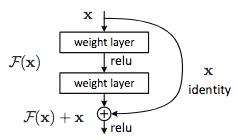

# Residual Blocks
- Different versions of the blocks.
  - differences in where to add the identity
  - (e) is preferred.

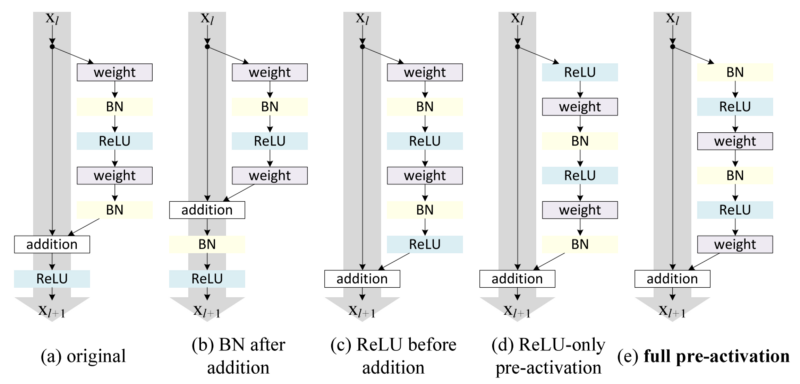

# Stacking Residual Blocks
- The network is learning a function (image to class)
  - build the function by appending residual blocks
  - each block learns a residual, which is added to the previous block
    - keep all the previous information and make small changes with the residual

# Residual Network (ResNet)
- 34 layers, 50 layers, 100 layers, 1000 layers
  - 3x3 filters
  - residual connection every two layers.

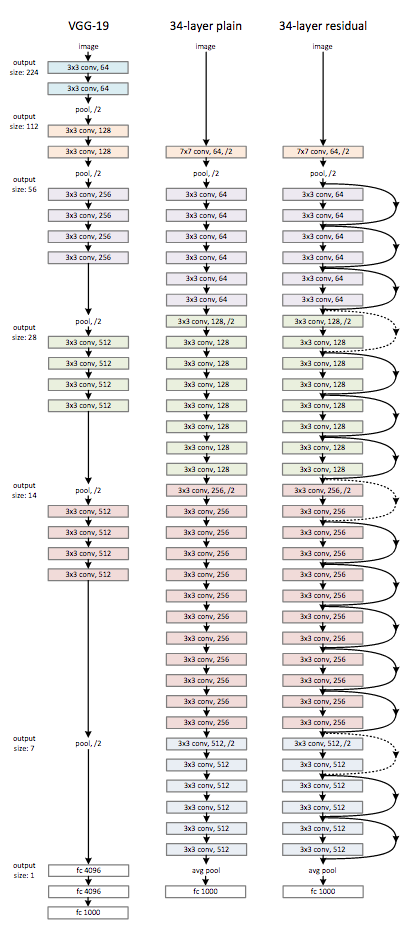

# Stages of CNN Feature Extraction

- **Convolutional Neural Networks (CNNs)**
  - learn features directly from raw image pixels.
- **Feature extraction occurs in stages:**
  - **Early layers:** Learn simple features (edges, textures).
  - **Middle layers:** Learn more complex patterns.
  - **Late layers:** Learn high-level features (object parts, objects).
- **Fully connected layers:** Map high-level features to output classes.

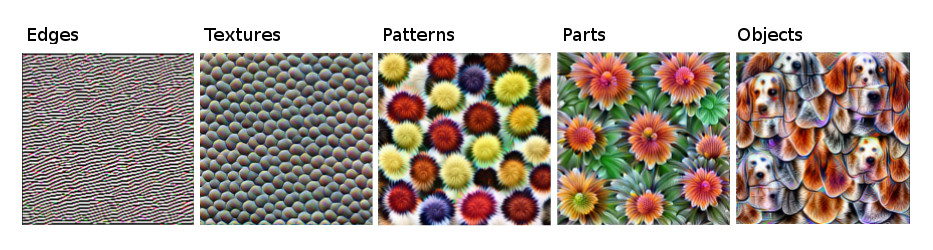

# Feature Visualization

- **Key Idea**
  - Make learned features explicit by finding input images that maximize the activation of a unit.
  - Unit could be:
    - individual neuron
    - feature channel (i.e., feature map)
    - entire layer
    - final class probability or logit
  - Helps us "see" what a neural network has learned at different abstraction levels.

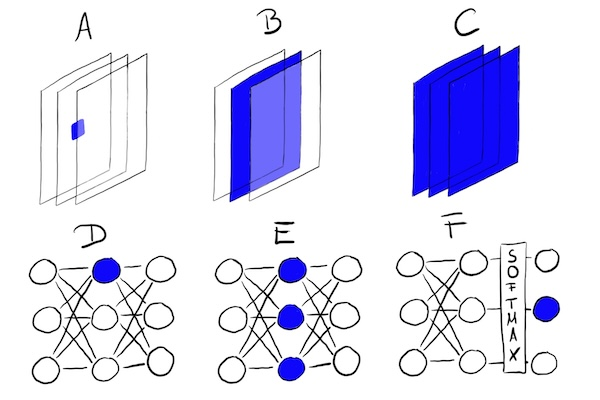

# Feature Visualization as Optimization Problem

- **Goal:** Find input $\mathbf{x}^*$ that maximizes the activation of a unit (neuron, channel, layer, etc).
- **Mathematical formulation:**
  - Let $h_{n,u,v,z}(\mathbf{x})$ be the output of a single neuron
    - layer $n$, channel $z$, spatial location $(u,v)$
  - For a neuron: 
    $$
    \mathbf{x}^* = \arg\max_\mathbf{x} h_{n,u,v,z}(\mathbf{x})
    $$
  - For a channel (mean activation):
    $$
    \mathbf{x}^* = \arg\max_x \sum_{u,v} h_{n,u,v,z}(\mathbf{x})
    $$

- **Example**
  - (left) positive activation, (right) negative activation
  - Could also minimize the activation of the unit (negative activation)

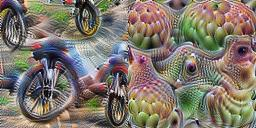

# Solutions

- **Two main approaches:**
  - **Select training images** that maximize activation
    - may be confounded when multiple objects/attributes appear (dog and cat).
    - cannot see what NN is actually looking for
  - **Generate new images** via optimization
    - start from noise, iteratively update to maximize activation.
    - Needs some regularization techniques: Jittering, rotation, scaling, frequency penalization, or using generative models (GANs, autoencoders).

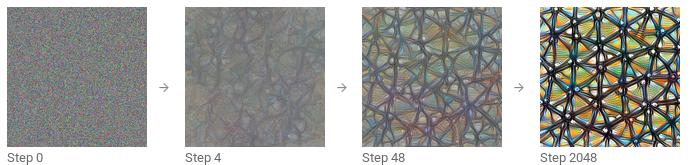

# Connection to Adversarial Images

- Both feature visualization and adversarial examples involve maximizing neuron activations.
- **Difference:** 
  - Adversarial examples start from a real image and aim for incorrect class activation
    - i.e., maximize activation of the wrong class (or minimize activation of the correct class)
  - Feature visualization often starts from noise and aims for maximal activation of a unit.
- **Insight:** Both reveal network sensitivities and vulnerabilities.


# Example Results from Paper
- Based on GoogLeNet trained on ImageNet dataset.
  - More results here: https://distill.pub/2017/feature-visualization/appendix/
- Visualizing different units.

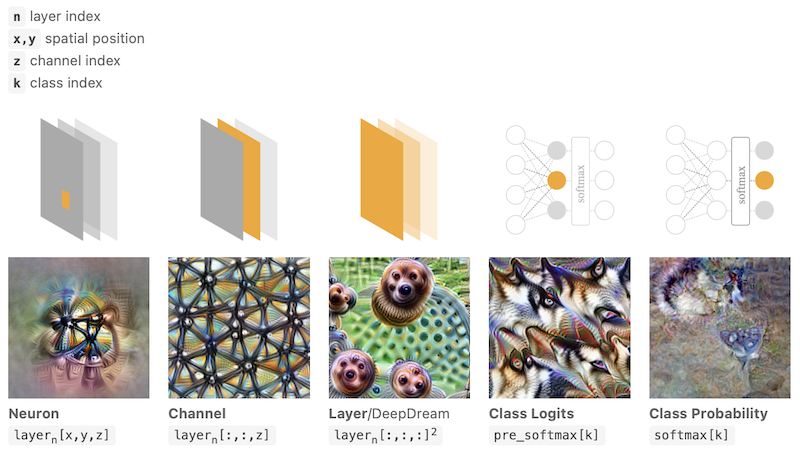

- Visualizing neurons
  - (top) images in the dataset that maximize the neuron.
  - (bottom) optimized image that maximizes the neuron.
    
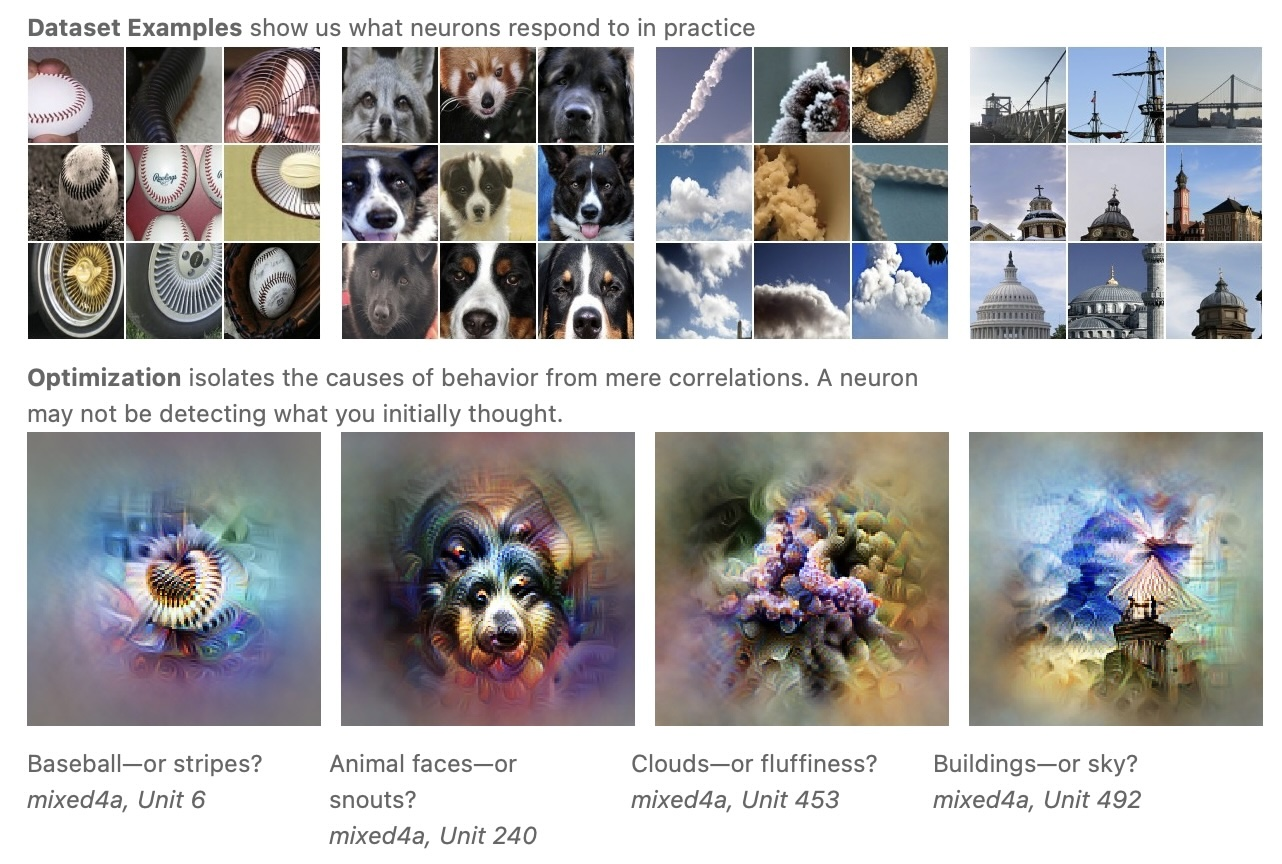

- Vizualizing different layers
  - from low to high: edges, textures, patterns, parts, objects

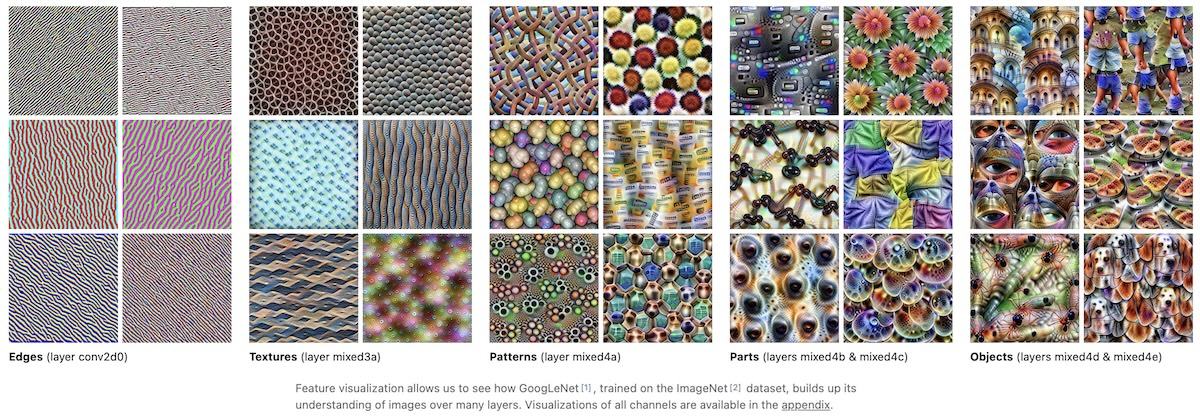

- Visualizing the images that maximize and minimize the unit response.

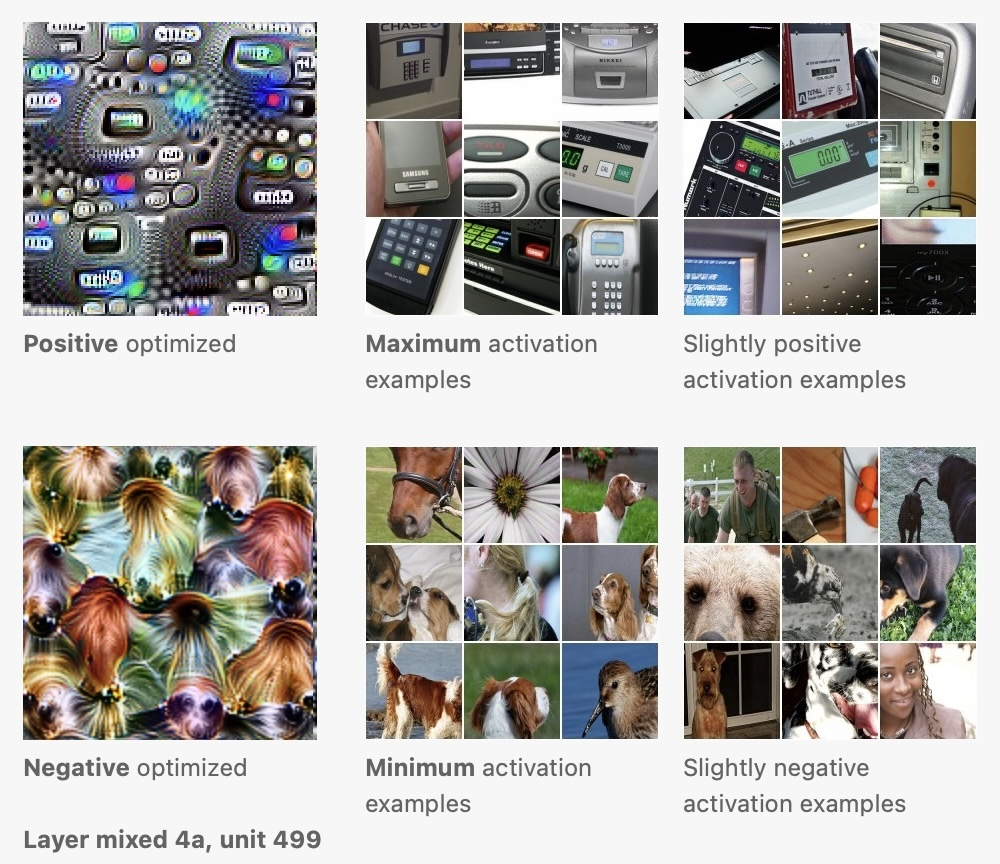

- Jointly optimizing two units to see how they interact.

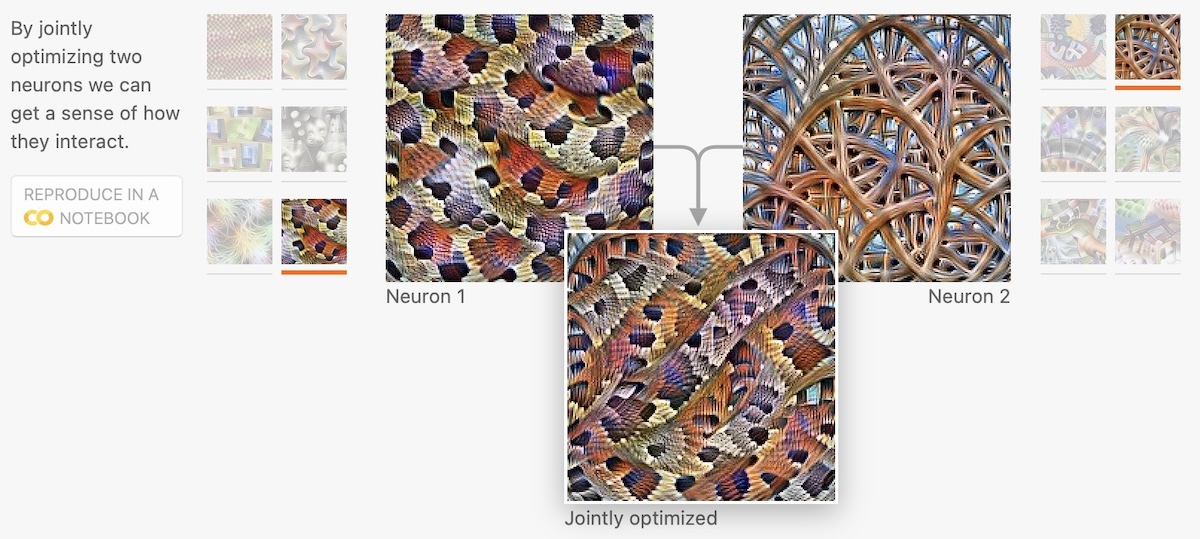

# Initialize PyTorch

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

print(f"Using pytorch version: {torch.__version__}")

if (torch.cuda.is_available()):
    device = torch.device("cuda:0")
    print(f"Using: {torch.cuda.get_device_name(device)}")
elif (torch.backends.mps.is_available()):
    device = torch.device("mps")
    print(f"Using: Apple MPS")
else:
    raise("no GPU available")

Using pytorch version: 2.8.0
Using: Apple MPS


In [5]:
def show_imgs(W_list, nc=10, highlight_green=None, highlight_red=None, titles=None):
    nfilter = len(W_list)
    nr = (nfilter - 1) // nc + 1
    for i in range(nr):
        for j in range(nc):
            idx = i * nc + j
            if idx == nfilter:
                break
            plt.subplot(nr, nc, idx + 1)
            cur_W = W_list[idx]
            plt.imshow(cur_W,cmap='gray', interpolation='nearest')  
            if titles is not None:
                plt.title(titles % idx)
            
            if ((highlight_green is not None) and highlight_green[idx]) or \
               ((highlight_red is not None) and highlight_red[idx]): 
                ax = plt.gca()
                if highlight_green[idx]:
                    mycol = '#00FF00'
                else:
                    mycol = 'r'
                for S in ['bottom', 'top', 'right', 'left']:
                    ax.spines[S].set_color(mycol)
                    ax.spines[S].set_lw(2.0)
                ax.xaxis.set_ticks_position('none')               
                ax.yaxis.set_ticks_position('none')
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                plt.gca().set_axis_off()
    plt.show()
    plt.close()

# Example on CIFAR10

In [6]:
# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

- Example images

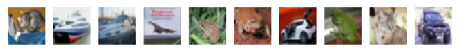

In [8]:
plt.figure(figsize=(8,3))
show_imgs(testset.data[0:10])

- Deep CNN
  - 4 convolution layers
  - MLP (1 hidden layer, 1 logit layers)

In [9]:
# Define deep CNN model
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Layer 1
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Layer 2
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Layer 3
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Layer 4
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

- Use the Lucent package for Feature Visualiation

In [10]:
import lucent.modelzoo.util as lu_zoo
import lucent.optvis as lu_optvis
from lucent.optvis import render as lu_render
from lucent.optvis import objectives as lu_obj

# Note: doesn't work with Apple MPS
ldevice = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# load model
model = DeepCNN().to(ldevice)
model.load_state_dict(torch.load('models/cifar10_cnn2.pth'))
model.to(ldevice).eval()
print(model)

DeepCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


- check the layer names that we can use

In [11]:
lu_zoo.get_model_layers(model)

['conv_layers',
 'conv_layers_0',
 'conv_layers_1',
 'conv_layers_2',
 'conv_layers_3',
 'conv_layers_4',
 'conv_layers_5',
 'conv_layers_6',
 'conv_layers_7',
 'conv_layers_8',
 'conv_layers_9',
 'fc_layers',
 'fc_layers_0',
 'fc_layers_1',
 'fc_layers_2',
 'fc_layers_3',
 'fc_layers_4']

- visualize feature channels for 2nd conv layer

In [32]:
conv2imgs   = []
conv2names  = ["conv_layers_2:0", "conv_layers_2:5", # number after colon is the channel
               "conv_layers_2:6", "conv_layers_2:7",
               "conv_layers_2:8"]
for x in conv2names:
    out = lu_optvis.render.render_vis(model, x, show_image=False)
    conv2imgs.append( squeeze(out[0]) )

100%|████████████████████████████████████████████████████████████████| 512/512 [00:23<00:00, 21.63it/s]


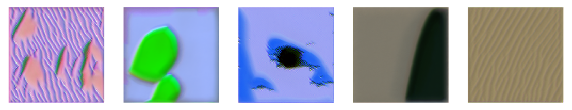

In [33]:
plt.figure(figsize=(10,4))
show_imgs(conv2imgs, nc=5)

- visualize feature channels for 3rd conv layer

In [35]:
conv5imgs = []
conv5names = ["conv_layers_5:1", "conv_layers_5:2",
               "conv_layers_5:3", "conv_layers_5:4",
               "conv_layers_5:5"]
for x in conv5names:
    out = lu_optvis.render.render_vis(model, x, show_image=False)
    conv5imgs.append( squeeze(out[0]) )

100%|████████████████████████████████████████████████████████████████| 512/512 [00:28<00:00, 18.00it/s]


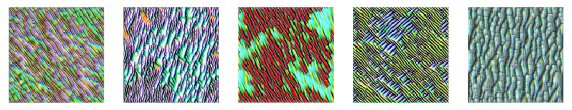

In [36]:
plt.figure(figsize=(10,5))
show_imgs(conv5imgs, nc=5)

- visualize feature channels for 4th conv layer

In [25]:
conv7imgs = []
conv7names = ["conv_layers_7:1", "conv_layers_7:2",
               "conv_layers_7:3", "conv_layers_7:4",
               "conv_layers_7:5"]
for x in conv7names:
    out = lu_optvis.render.render_vis(model, x, show_image=False)
    conv7imgs.append( squeeze(out[0]) )

100%|████████████████████████████████████████████████████████████████| 512/512 [00:37<00:00, 13.50it/s]


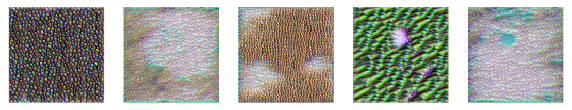

In [30]:
plt.figure(figsize=(10,4))
show_imgs(conv7imgs, nc=5)

- **Summary**
  - Conv2 looks at edges and solid patterns
  - Conv5 looks at textures (unidirectional)
  - Conv7 looks at more complex textures

# Network Dissection

- **Goal:**
  - Link neural network units (channels) to human concepts (objects, textures, colors).
- **Key points**
  - Quantifies interpretability by measuring alignment between unit activations and labeled concepts.
  - Requires datasets with pixel-wise human-labeled concepts (e.g., Broden dataset).

# Question of Disentangled Features

- Do convolutional neural networks learn *disentangled* features?
   - **Disentangled features:** Individual units detect specific real-world concepts.
     - e.g., one feature channel is for skyscraper, one for dog ears, etc.
  - **Entangled features:** Concepts are distributed across many units.
    - all channels work together to recognize dog ears.
- **Implications:** Disentangled networks are more interpretable
  - allowing tracking of decision-making
    - e.g., the husky classifier unit was activated from the dog-snout unit, fluffy fur unit, and snow unit.
  - detection of bias.
    - e.g., check if the activated units are indeed causually correlated with the concept. 
- **Reality:** CNNs are not perfectly disentangled; many units may detect the same or no clear concept.


# Network Dissection Algorithm

1. **Collect images with human-labeled visual concepts** (Broden dataset: 60,000 images, 1,000+ concepts).
2. **Measure activations:** For each channel and image, compute activation masks.
3. **Quantify the Alignment of activations with labeled concepts:** based on overlap.

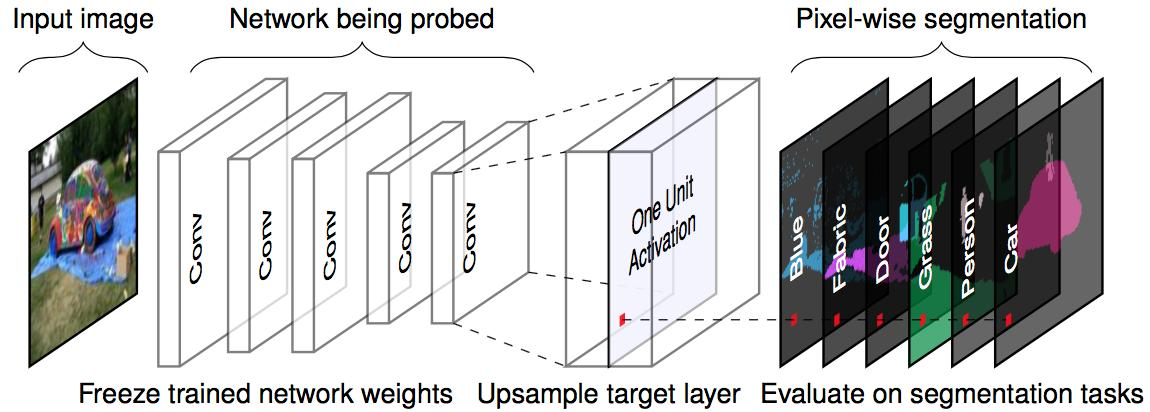

# Step 1: Collect Labeled Images

- **Goal:** Gather images with pixel-wise human-labeled concepts (objects, textures, colors, scenes, etc.).
- **Broden Dataset:** Combines multiple datasets to provide 60,000+ images labeled with over 1,000 concepts.
  - Concepts include scenes, objects, parts, materials, textures, and colors.
- **Importance:** Enables mapping of neural network activations to interpretable human concepts.

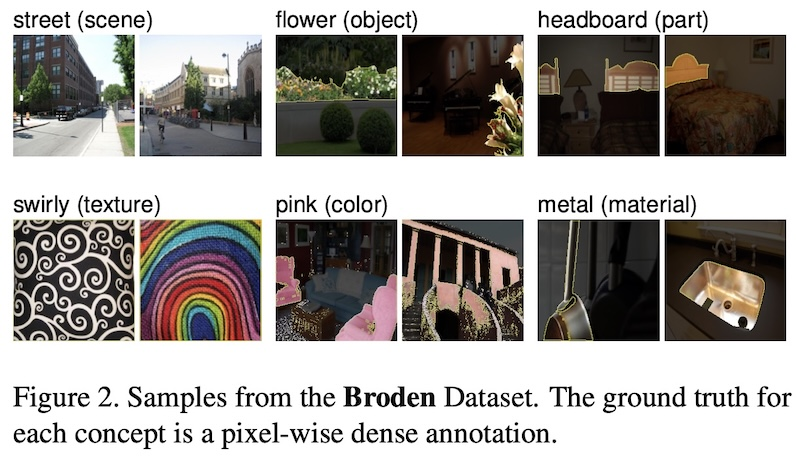

# Step 2: Measure Channel Activations

- For each convolutional channel $k$,
  - For each image $\mathbf{x}$:
    - **Forward propagate** image $\mathbf{x}$ to the target layer containing channel $k$.
    - **Extract pixel activations** of channel $k$: $A_k(\mathbf{x})$.
    - **Calculate the distribution** of pixel activations $\alpha_k$ over all images.
  - **Determine the activation threshold** $T_k$ such that 99.5% of activations in $\alpha_k$ are below $T_k$.
  - For each image $\mathbf{x}$:
    - **Upscale activation map** to match the resolution of image $x$, denoted as $S_k(\mathbf{x})$.
    - **Binarize the activation map**: based on the threshold
     $$
     M_k(\mathbf{x}) = S_k(\mathbf{x}) \geq T_k
     $$
    - $M_k(\mathbf{x})$ is the mask indicating "on" pixels (above threshold).

- **Result:** For each channel $k$ and image $\mathbf{x}$, we have a binary mask  $M_k(\mathbf{x})$ highlighting areas of strong activation.



# Step 3: Align Activations with Concepts

- **Objective:** Quantify how well each channel's activation mask matches labeled concepts.
- **Method:**
  - Compare activation masks with ground-truth concept masks using Intersection over Union (IoU):
    $$
    \mathrm{IoU}_{k,c} = \frac{\sum_{\mathbf{x}}|M_k(\mathbf{x}) \cap L_c(\mathbf{x})|}{\sum_{\mathbf{x}}|M_k(\mathbf{x}) \cup L_c(\mathbf{x})|}
    $$
  - A channel is considered a detector for a concept if $\mathrm{IoU}_{k,c} > 0.04$.
- **Outcome:** Identifies which channels respond to specific human concepts, measuring interpretability.

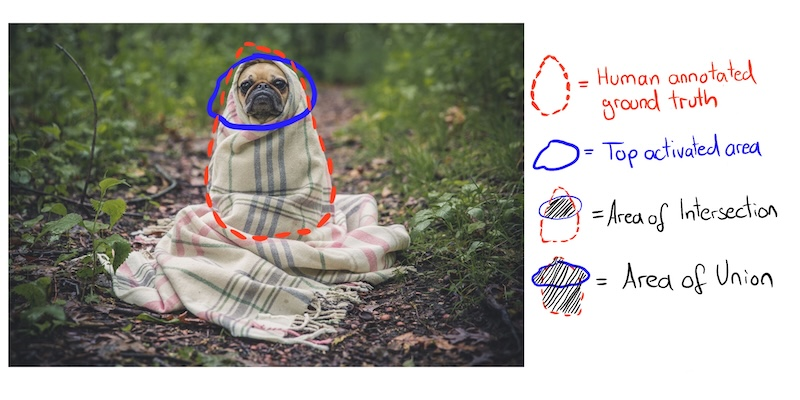

# Some Example Results

- Activation masks of a feature channel that detects dogs with IoU=0.203.

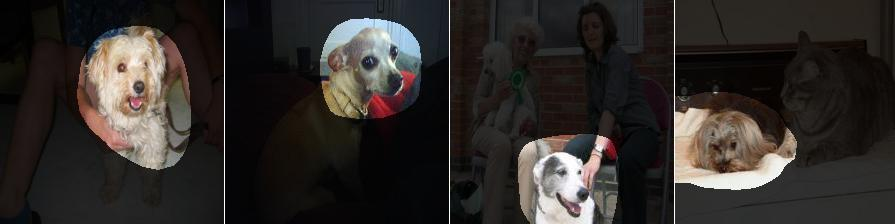

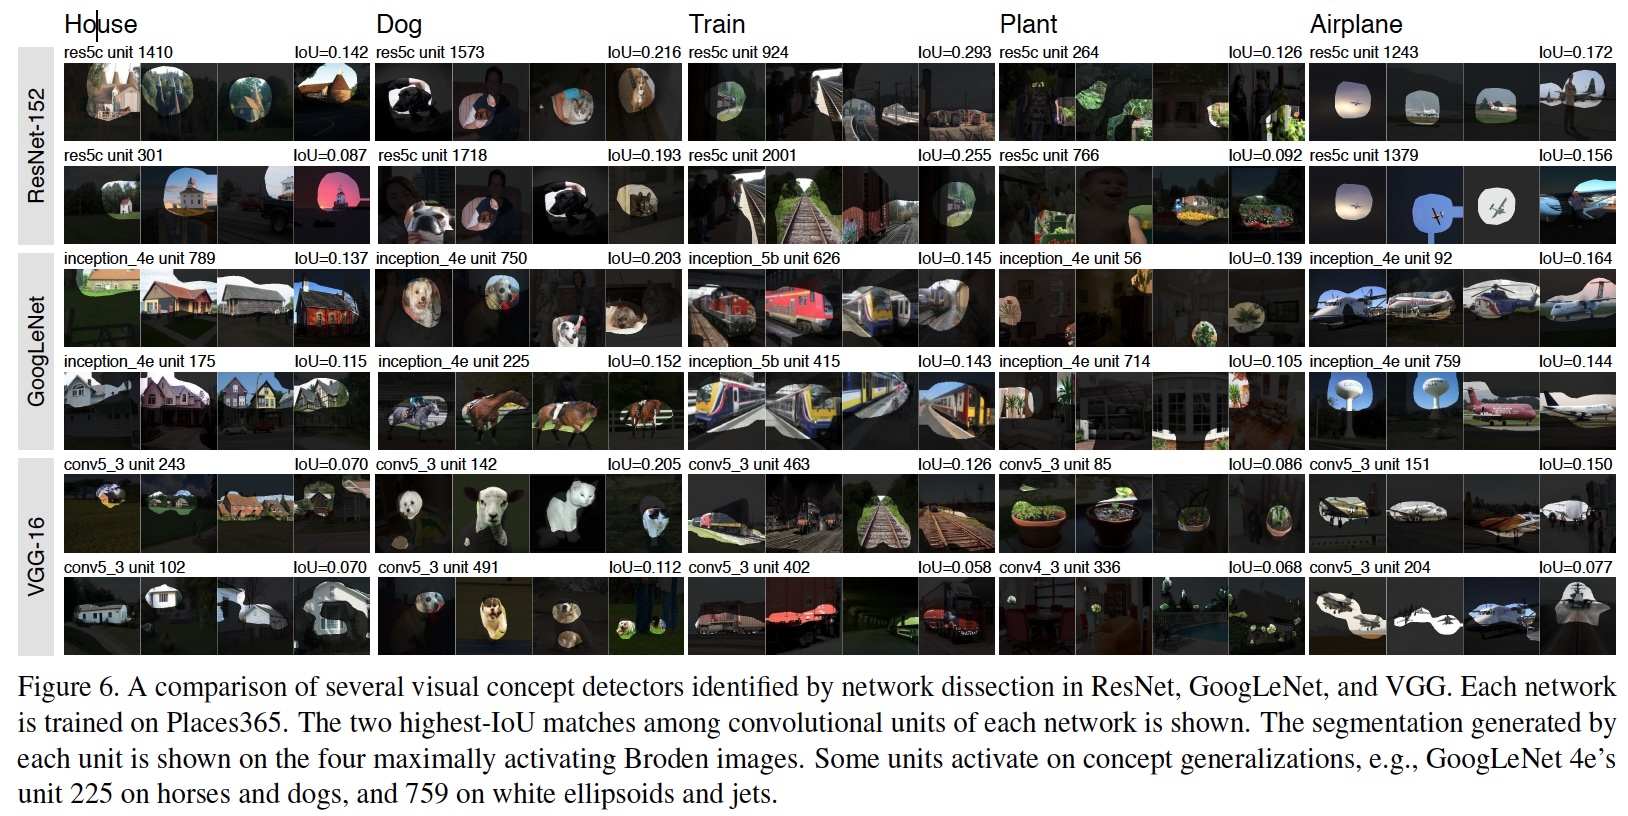

# Experiment Results
- Visualization results on many networks
  - https://netdissect.csail.mit.edu/#:~:text=Network%20Dissection%20Results
- **Findings:**
  - Lower layers detect simple features; higher layers detect complex concepts.
  - Batch normalization reduces unique concept detectors.
  - Many units detect the same concept (e.g., 95 "dog" channels).
  - More channels = more interpretable units.
  - The number of unique concept detectors increases with the number of training iterations.
  - Training with self-supervised tasks leasds to less concept detectors than supervised training. 
  - Transfer learning can change the focus of the concept detector (e.g., dog to waterfall)


# Strengths and Limitations: Feature Visualization and Network Dissection

- **Strengths:**
  - Provides unique insight into the feature extractors of the network (neurons, channels)
  - Enables linking units to human concepts.
  - Useful for communication in a non-technical way.
  - Can be combined with feature attribution for richer explanations.
- **Limitations:**
  - Many visualizations are not interpretable -- abstact features.
  - Not all units align with human concepts.
  - Too many units to analyze exhaustively (e.g., 5000 channels).
  - For network detection, pixel-wise labeled datasets are required (labor-intensive).
  - Can create an illusion of interpretability — networks remain complex and not fully understood.
    - IoU could be low, units may respond to the same concept, or multiple concepts.
    - Units are not completely disentangled. 

# References 

- **Feature Visualization**
  - Olah, Mordvintsev, Schubert, "Feature Visualization", Distill.pub (2017) https://distill.pub/2017/feature-visualization/
  - "The Building Blocks of Interpretability" (2018) https://distill.pub/2018/building-blocks/
  - Software:
    - Lucid (tensorflow) - https://github.com/tensorflow/lucid
    - Lucent (pytorch version) - https://github.com/greentfrapp/lucent
      - documentation: https://lucent.readthedocs.io/en/latest/index.html
      - tutorials: https://lucent.readthedocs.io/en/latest/tutorials/notebooks.html
- **Network Dissection**
  - Bau et al., "Network Dissection: Quantifying Interpretability of Deep Visual Representations", CVPR 2017.
  - Project page: https://netdissect.csail.mit.edu
  - Software:
    - NetDissect (original): https://github.com/CSAILVision/NetDissect
    - NetDissect-Lite (improved): https://github.com/CSAILVision/NetDissect-Lite